In [110]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sns

In [75]:

# Load the datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')


In [76]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [80]:
# List of columns to drop
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

# Drop columns from training dataset
train_df.drop(columns_to_drop, axis=1, inplace=True)

# Drop columns from testing dataset
test_df.drop(columns_to_drop, axis=1, inplace=True)


In [81]:
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [82]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [83]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0.5, 0.98, 'Histograms for Numerical Features')

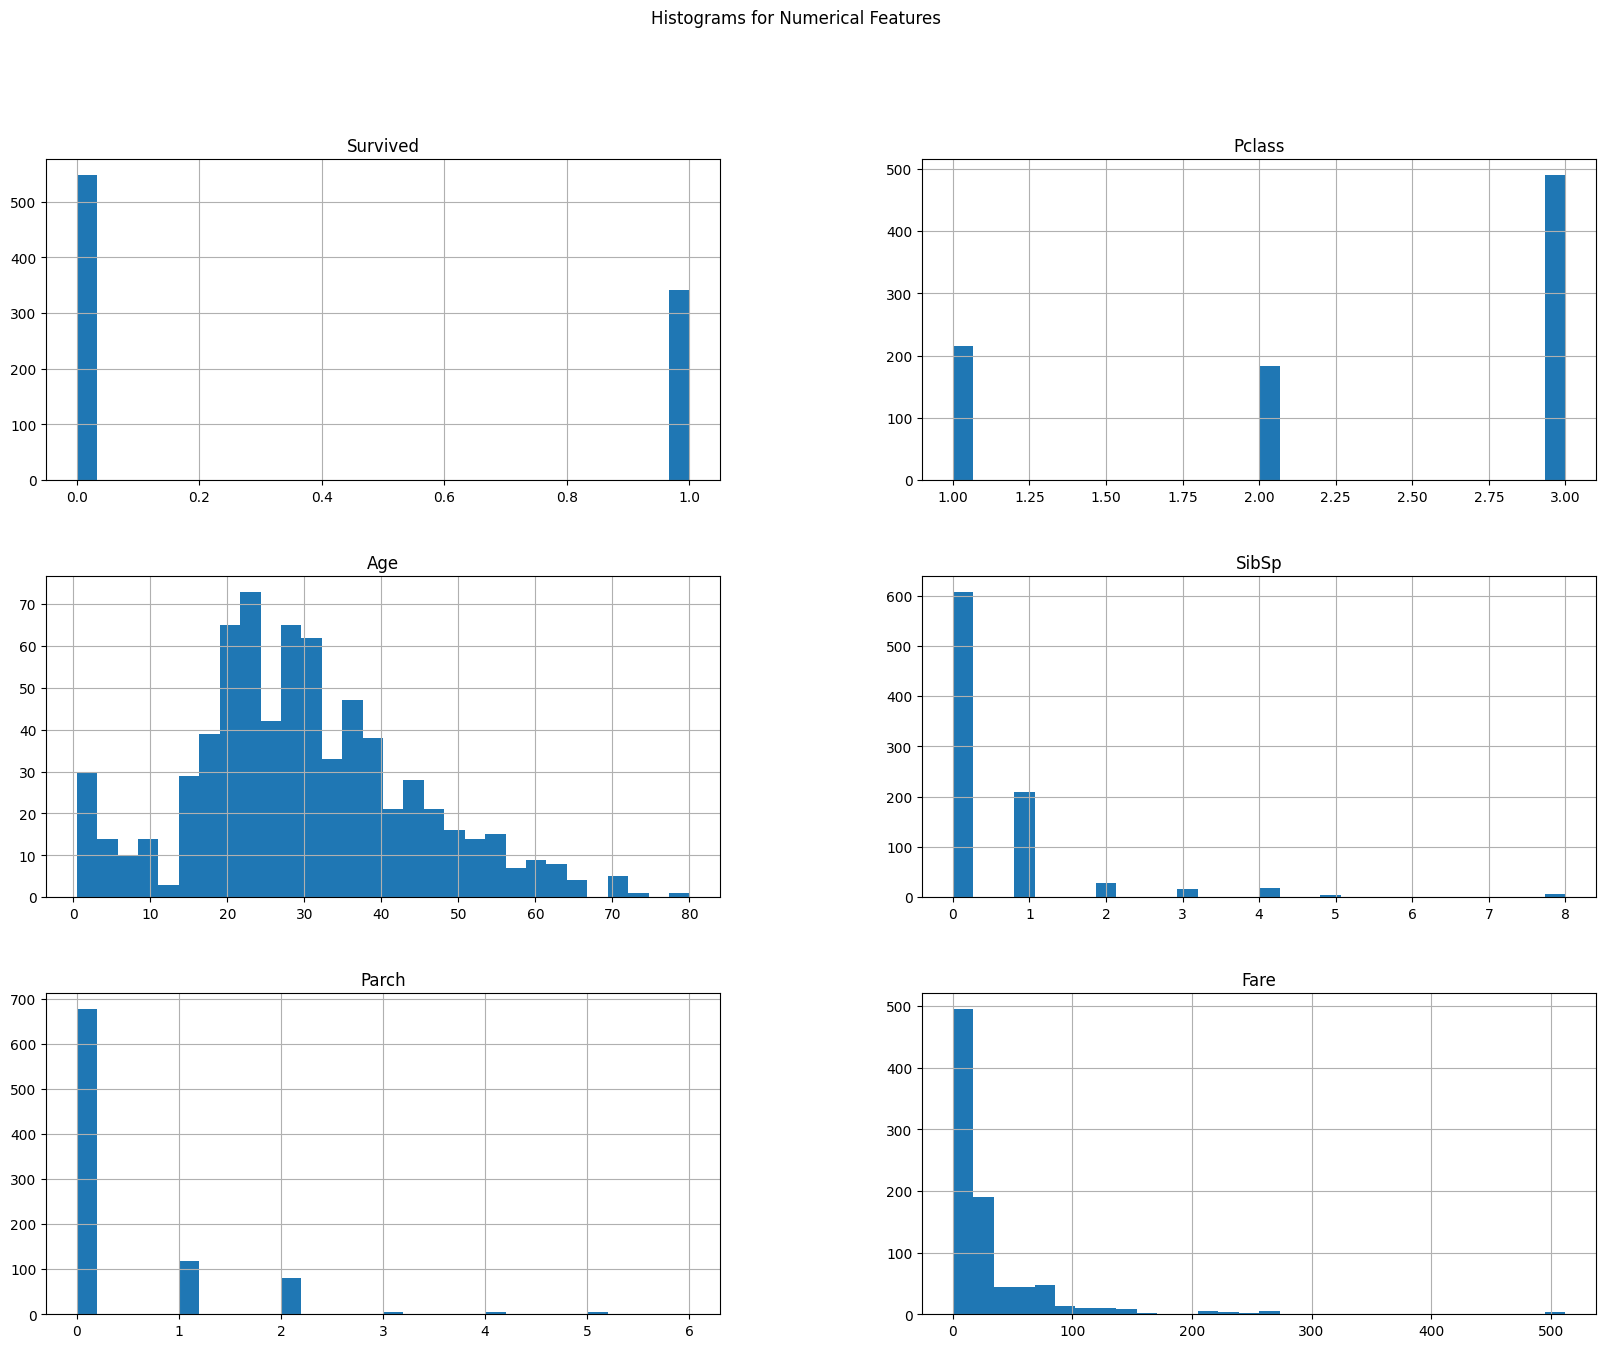

In [85]:
# Plot histograms for numerical features in the training dataset 

train_df.hist(bins=30, figsize=(20, 15)) 
plt.suptitle('Histograms for Numerical Features')

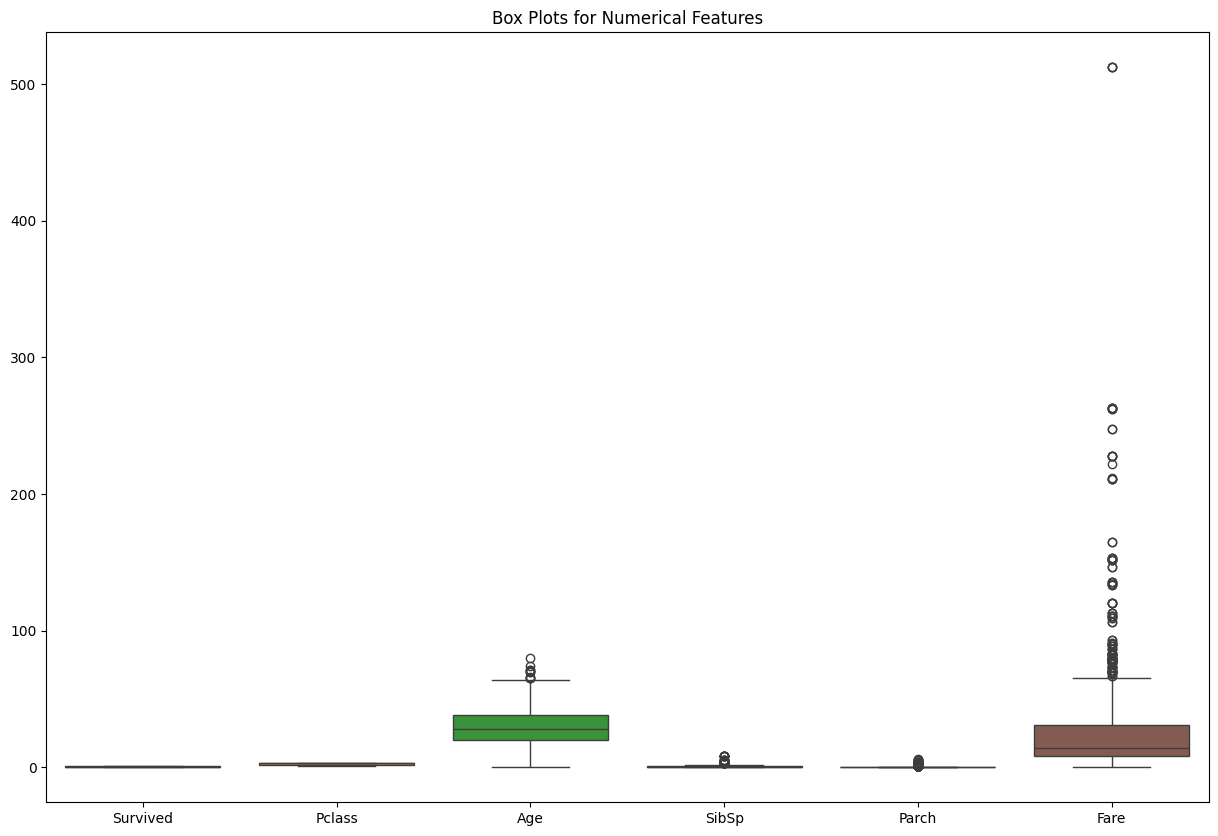

In [86]:
# Box plots to understand distributions and detect outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plots for Numerical Features')
plt.show()


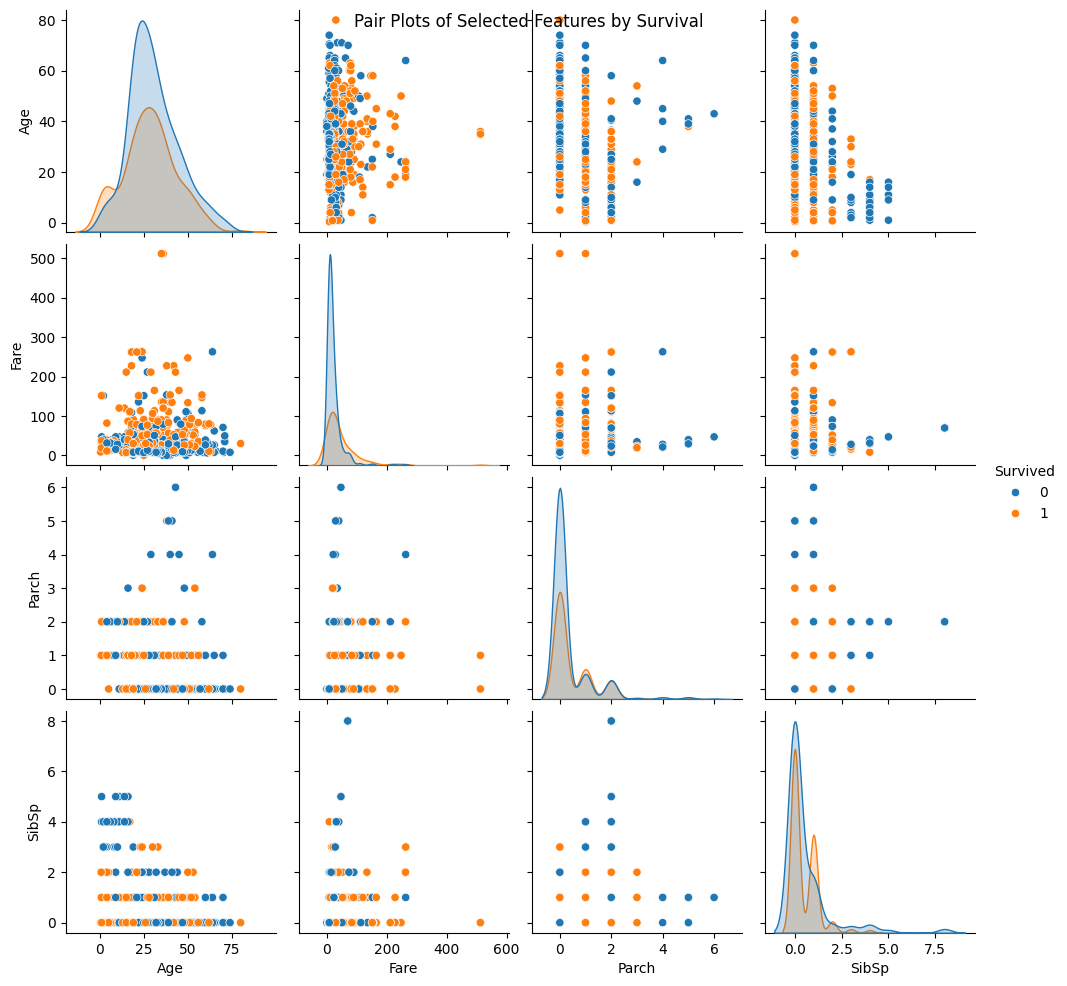

In [87]:
# Pair plots to visualize relationships between features
sns.pairplot(train_df, hue='Survived', vars=['Age', 'Fare', 'Parch', 'SibSp'])
plt.suptitle('Pair Plots of Selected Features by Survival')
plt.show()


In [88]:
# Check for missing values in the training dataset
print(train_df.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [89]:
# Check for missing values in the testing dataset
print(test_df.isnull().sum())


Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [90]:
# Impute Age with median grouped by Pclass and Sex
train_df['Age'] = train_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))


In [91]:
# Impute Embarked with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Impute Fare with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


C:\Users\rites\AppData\Local\Temp\ipykernel_16696\3417184260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
C:\Users\rites\AppData\Local\Temp\ipykernel_16696\3417184260.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [92]:

# Check again for null values
print(train_df.isnull().sum())
print(test_df.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [93]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [98]:
print(train_df['Pclass'].unique())
print(train_df['Sex'].unique())
print(train_df['Embarked'].unique())
print(test_df['Pclass'].unique())
print(test_df['Embarked'].unique())


[3 1 2]
['male' 'female']
['S' 'C' 'Q']
[3 2 1]
['Q' 'S' 'C']


In [100]:
# Perform one-hot encoding
train_dfA = pd.get_dummies(train_df, columns=['Sex', 'Pclass', 'Embarked'], drop_first=False)
test_dfA = pd.get_dummies(test_df, columns=['Sex', 'Pclass', 'Embarked'], drop_first=False)

# Ensure all dummy columns are present in both datasets
expected_columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 
                    'Embarked_S', 'Embarked_Q', 'Embarked_C', 
                    'Sex_male', 'Sex_female']
for col in expected_columns:
    if col not in train_dfA:
        train_dfA[col] = 0  # Add missing column with default value 0
    if col not in test_dfA:
        test_dfA[col] = 0  # Add missing column with default value 0


# Convert boolean columns in train_dfA and test_dfA to integers
train_dfA = train_dfA.astype(int)
test_dfA = test_dfA.astype(int)


In [104]:
train_dfA.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22,1,0,7,0,1,0,0,1,0,0,1
1,1,38,1,0,71,1,0,1,0,0,1,0,0
2,1,26,0,0,7,1,0,0,0,1,0,0,1
3,1,35,1,0,53,1,0,1,0,0,0,0,1
4,0,35,0,0,8,0,1,0,0,1,0,0,1


In [103]:
test_dfA.head()


,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34,0,0,7,0,1,0,0,1,0,1,0
1,47,1,0,7,1,0,0,0,1,0,0,1
2,62,0,0,9,0,1,0,1,0,0,1,0
3,27,0,0,8,0,1,0,0,1,0,0,1
4,22,1,1,12,1,0,0,0,1,0,0,1


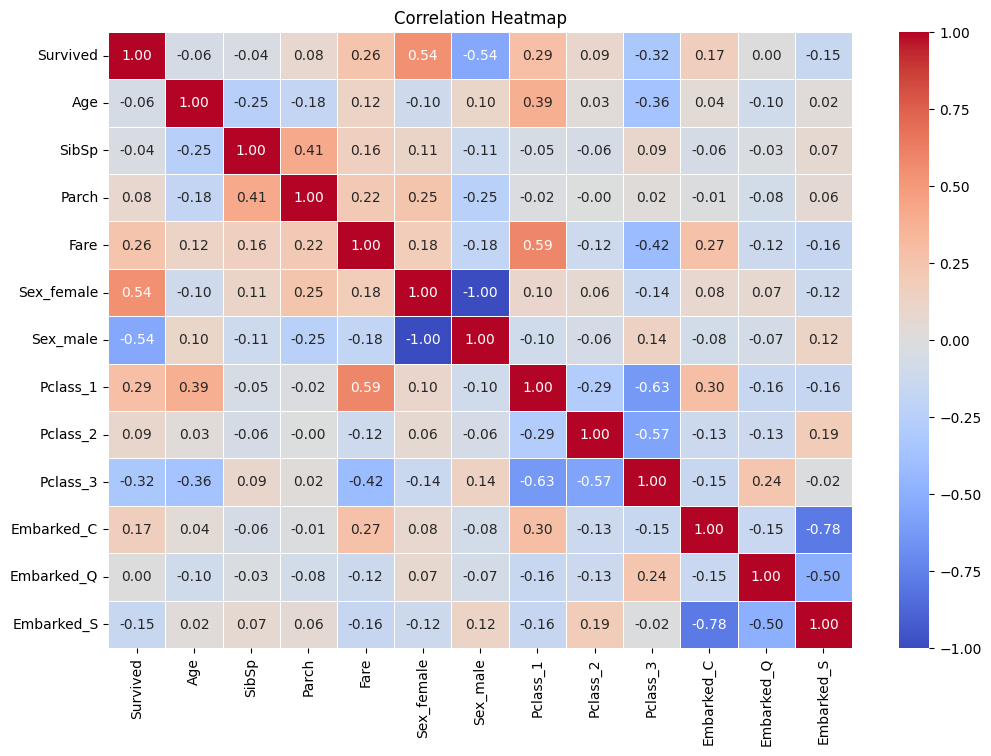

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = train_dfA.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Set figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)

# Display the plot
plt.title("Correlation Heatmap")
plt.show()


Accuracy: 0.81
Precision: 0.79
Recall: 0.71
F1-Score: 0.75
ROC-AUC Score: 0.79


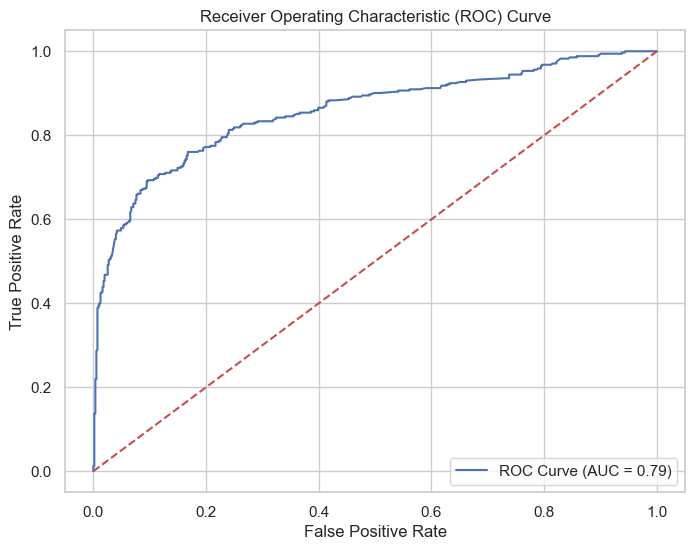

In [108]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Prepare the data
X = train_dfA.drop(columns=['Survived'])  # Features (drop target column)
y = train_dfA['Survived']  # Target variable

# Step 3: Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increase iterations if needed for convergence

# Step 4: Train the model using the full training data
logreg.fit(X, y)

# Step 5: Make predictions on the training data (to evaluate the model)
y_train_pred = logreg.predict(X)

# Step 6: Evaluate the model
accuracy = accuracy_score(y, y_train_pred)
precision = precision_score(y, y_train_pred)
recall = recall_score(y, y_train_pred)
f1 = f1_score(y, y_train_pred)
roc_auc = roc_auc_score(y, y_train_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Step 7: Plot ROC Curve for training data
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Step 8: Make predictions on the test set
y_test_pred = logreg.predict(test_dfA)

# You can now use y_test_pred for further analysis or submission


In [111]:
# Step 1: Get the coefficients and feature names
coefficients = logreg.coef_[0]  # Coefficients for each feature
feature_names = X.columns  # Feature names (from training data)

# Step 2: Create a DataFrame for easier interpretation
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df['Odds Ratio'] = coeff_df['Coefficient'].apply(lambda x: round(np.exp(x), 2))

# Step 3: Display the coefficients and odds ratios
print(coeff_df)


       Feature  Coefficient  Odds Ratio
0          Age    -0.041578        0.96
1        SibSp    -0.337083        0.71
2        Parch    -0.087276        0.92
3         Fare     0.002419        1.00
4   Sex_female     1.316994        3.73
5     Sex_male    -1.315607        0.27
6     Pclass_1     1.073632        2.93
7     Pclass_2     0.087892        1.09
8     Pclass_3    -1.160137        0.31
9   Embarked_C     0.183557        1.20
10  Embarked_Q     0.032148        1.03
11  Embarked_S    -0.214318        0.81


Gender is the most important predictor of survival, with females being much more likely to survive than males.

Passenger Class plays a significant role, with 1st class passengers being far more likely to survive than 3rd class passengers.

Embarked Port has a smaller effect, but passengers from Cherbourg (C) have a slightly higher chance of survival.

Age, SibSp, and Parch have weaker effects, but they still contribute to the model. Older passengers and those with more siblings/spouses or parents/children aboard are less likely to survive.

In [114]:
import joblib

# Save the trained model to a file
joblib.dump(logreg, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

**Precision:**

Definition: Precision, also known as the positive predictive value, measures the proportion of correctly identified positive instances out of all instances predicted as positive.

Formula:

$$ Precision ={ True Positives \over True Positives  +False Positives}  $$

Use Case: High precision is crucial when the cost of false positives is high, such as in spam detection, where you want to minimize the number of legitimate emails marked as spam.


**Recall:**

Definition: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly identified positive instances out of all actual positive instances.

Formula:

$$Recall = { True Positives \over True Positives + False Negatives} $$

Use Case: High recall is essential when the cost of false negatives is high, such as in medical diagnostics, where you want to ensure that all positive cases are identified.

**Cross-Validation:**

Definition: Cross-validation is a technique used to evaluate the performance of a model by partitioning the data into multiple subsets. The model is trained on a subset of the data (training set) and validated on the remaining subset (validation set). This process is repeated multiple times with different subsets to ensure that the model's performance is consistent across different parts of the data.

Importance in Binary Classification:

Model Robustness: Cross-validation helps assess how well the model generalizes to new, unseen data by evaluating it on multiple subsets of the data. This ensures the model is not overfitting to the training data.

Performance Stability: By providing multiple performance metrics across different subsets, cross-validation gives a more reliable estimate of the model's performance. This is especially important in binary classification, where the class distribution might be imbalanced.

Hyperparameter Tuning: Cross-validation allows for the tuning of hyperparameters in a way that avoids overfitting. By evaluating different configurations on multiple subsets, it helps find the optimal settings that perform best across all folds.

Bias-Variance Trade-off: It helps in understanding the bias-variance trade-off in the model. High variance models may perform well on the training set but poorly on validation sets, whereas high bias models may underperform consistently. Cross-validation helps strike a balance.